# Anova Feature Selection Method by `Mr. Harshit Dawar!`
* It is used to Test the Hypothesis that 2 or more features are having the same mean.


* It is also a Univariate Feature Selection Method.


* It stands for Analysis of Variance.


* It can be used for Categorical as well as Numerical Features.


* It also calculates the p-value of the Features. The less the p - value is for a particular feature, the more the significance of that particular feature. But be cautiaus with this fact in very large dataset, because there the sample size may make the p-value of some feature to be very small, but in that case there might be a possibility that the feature is not that much strong to predict the Target.

In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif, SelectKBest

# ANOVA for Classification!

In [2]:
# Loading the Dataset

data = pd.read_csv("../ds/Titanic_Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Processing the Dataset

data.drop(["PassengerId", "Name", "Cabin", "Ticket", "Fare"], axis = 1, inplace = True )

In [5]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [6]:
def processSex(sex):
    if sex == 'male':
        return 0
    elif sex == 'female':
        return 1
    else:
        pass

data.Sex = data.Sex.map(processSex)

In [7]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,S
1,1,1,1,38.0,1,0,C
2,1,3,1,26.0,0,0,S
3,1,1,1,35.0,1,0,S
4,0,3,0,35.0,0,0,S


In [8]:
data.Age.fillna(data.Age.mean(), inplace = True)
data.dropna(inplace = True)

In [9]:
data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
def processEmbarked(Embarkment):
    if Embarkment == "S":
        return 1
    elif Embarkment == "C":
        return 2
    else:
        return 3
    
data.Embarked = data.Embarked.map(processEmbarked)

In [11]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,1
1,1,1,1,38.0,1,0,2
2,1,3,1,26.0,0,0,1
3,1,1,1,35.0,1,0,1
4,0,3,0,35.0,0,0,1


In [12]:
X = data.drop('Survived', axis = 1)
y = data.Survived

In [13]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.0,1,0,1
1,1,1,38.0,1,0,2
2,3,1,26.0,0,0,1
3,1,1,35.0,1,0,1
4,3,0,35.0,0,0,1


In [14]:
# Applying Anova 
anova_Selector = f_classif(X, y)

In [15]:
anova_Selector

(array([112.54140208, 368.1547322 ,   4.9736859 ,   1.02897829,
          6.17546233,  10.59964657]),
 array([7.77691629e-25, 6.68201214e-69, 2.59852572e-02, 3.10675373e-01,
        1.31367662e-02, 1.17396188e-03]))

In [16]:
pValues = pd.Series(anova_Selector[1])
pValues.index = X.columns

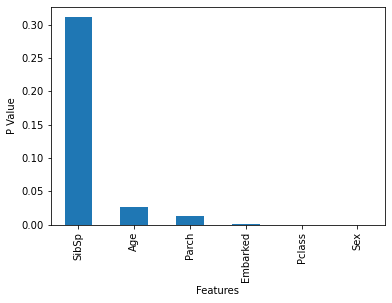

In [17]:
# Plotting the p values of the Features!
pValues.sort_values(ascending = False).plot(kind = "bar")
plt.ylabel("P Value")
plt.xlabel("Features")
plt.show()

***Features at the right are the most significant Features because their p values are smallest!***

In [18]:
# Selecting Features using SelectKBest

Feature_Selector = SelectKBest(f_classif, k = 3).fit(X, y)

In [19]:
X.columns[Feature_Selector.get_support()]

Index(['Pclass', 'Sex', 'Embarked'], dtype='object')

***As you can see, 3 features that are provided are the same which are present in the above Bar Graph!***

# Congratulations, you have learned a new Filter method to select the Features!